 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_path = Path("./Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_returns = whale_returns.rename(columns={'PAULSON & CO.INC. ':'PAULSON & CO.INC.'})
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [59]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
algo_returns.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.count()

Algo 1    1235
Algo 2    1235
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
tsx_path = Path("./Resources/sp_tsx_history.csv")
tsx_returns = pd.read_csv(tsx_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
tsx_returns.sample(5)

,Close
Date,
2015-09-23,"$13,383.69"
2019-09-11,"$16,611.14"
2018-08-02,"$16,409.16"
2016-10-17,"$14,596.52"
2018-06-22,"$16,450.14"


In [12]:
# Check Data Types
tsx_returns.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
tsx_returns["Close"] = tsx_returns["Close"].str.replace("$","")
tsx_returns["Close"] = tsx_returns["Close"].str.replace(",","")
tsx_returns.head()

C:\Users\Duc L\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
tsx_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# also can: tsx_returns["Close"] = pd.to_numeric(tsx_returns["Close"],errors='coerce')
tsx_returns["Close"] = tsx_returns["Close"].astype(float)
tsx_returns.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [16]:
# Calculate Daily Returns
tsx_returns["Close"] = tsx_returns["Close"].pct_change(1)
tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [17]:
# Drop nulls
tsx_returns.dropna(inplace=True)
tsx_returns.count()

Close    1817
dtype: int64

In [18]:
# Rename `Close` Column to be specific to this portfolio.
tsx_returns = tsx_returns.rename(columns={"Close":"S&P TSX"})
tsx_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([whale_returns,algo_returns,tsx_returns],axis="columns", join = "inner")
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

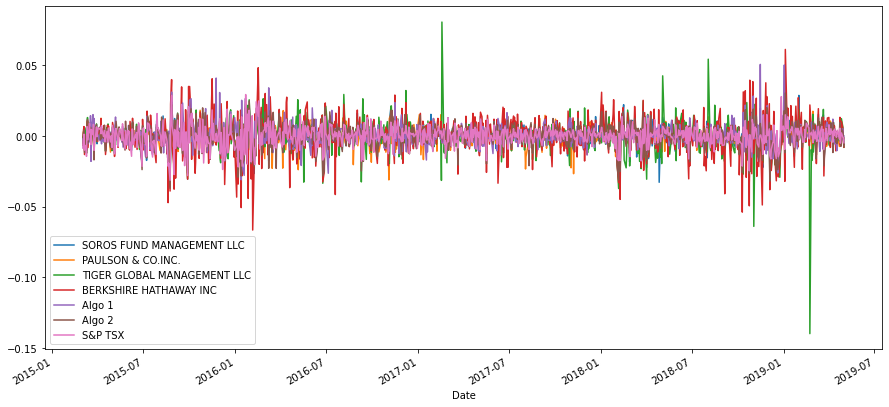

In [20]:
# Plot daily returns of all portfolios
df.plot(figsize=(15,7))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

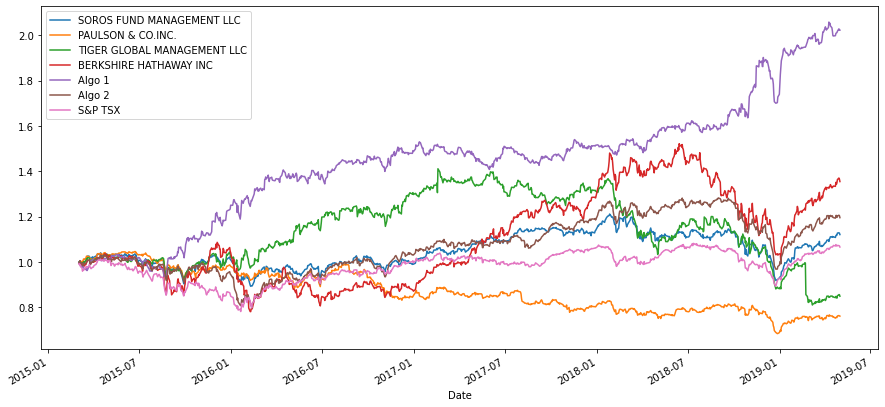

In [21]:
# Calculate cumulative returns of all portfolios
df_cum_returns = (1 + df).cumprod().dropna()

# Plot cumulative returns
df_cum_returns.plot(figsize=(15,7))

### Performance Analysis
* Soro, Algo 2, Berkshire and Algo 1 performed better than TSX 60

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

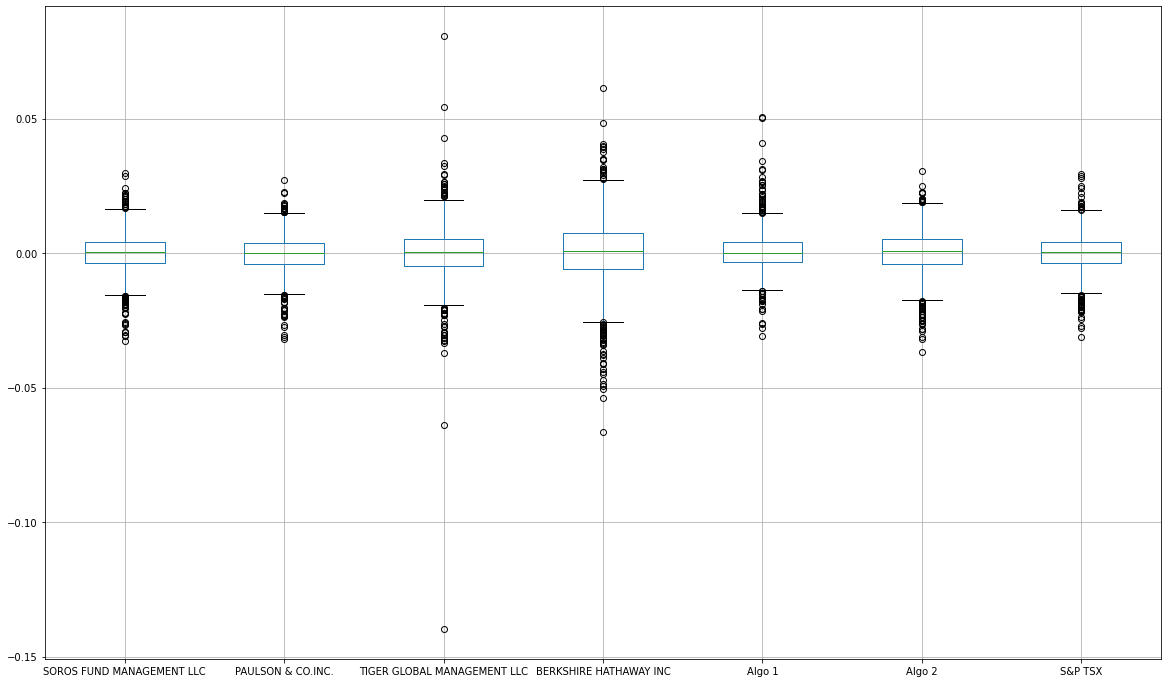

In [22]:
# Box plot to visually show risk
df.boxplot(figsize=(20,12))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
df_std = df.std()
df_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
#see above
# Determine which portfolios are riskier than the S&P TSX 60
#All portfolio, except Paulson & Co, are risker than S&P TSX60.

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
# annualized standard deviation (squareroot of annualuzed variance)
df_annualised_std = df_std * np.sqrt(252)
df_annualised_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

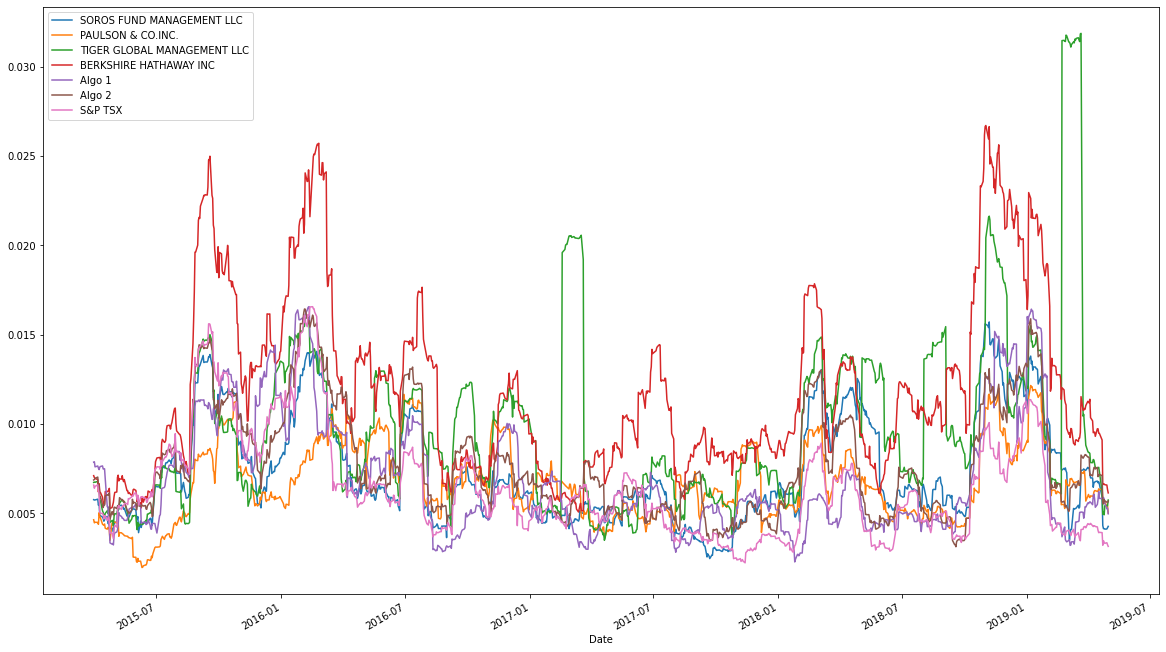

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_std_rolling = df.rolling(window=21).std().copy()
# Plot the rolling standard deviation
df_std_rolling.plot(figsize =(20,12))

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
df_corr = df.corr()
# Display de correlation matrix
df_corr.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

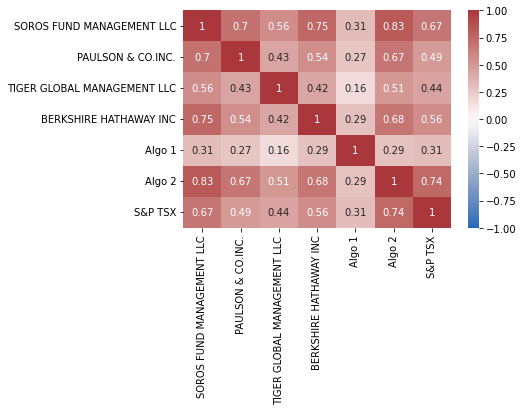

In [28]:
sns.heatmap(df_corr, vmin=-1, vmax=1,center=0, annot=True, cmap='vlag')

* Algo 2 has highest correlation with the S&P TSX 60, thus is mimic the S&P TSX 60

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

* choose SOROS portfolio, and S&P TSX 60 daily returns data over the same period

In [29]:
# Calculate covariance of a single portfolio
soros_cov = df["SOROS FUND MANAGEMENT LLC"].cov(df["S&P TSX"])
soros_cov

3.710689907855225e-05

In [30]:
# Calculate variance of S&P TSX
tsx_var=df.loc[:,"S&P TSX"].var()
tsx_var

4.9479515915131015e-05

In [31]:
# Computing beta
soros_beta = soros_cov/tsx_var
soros_beta

0.7499446668435337

In [32]:
# Plot beta trend over 60-day
cov_rolling = df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(df["S&P TSX"]).dropna()
var_rolling = df['S&P TSX'].rolling(window=60).var().dropna()
soros_beta_rolling = cov_rolling/var_rolling
soros_beta_rolling

Date
2015-05-28    0.608617
2015-05-29    0.618403
2015-06-01    0.623193
2015-06-02    0.622863
2015-06-03    0.611847
                ...   
2019-04-25    0.913204
2019-04-26    0.918302
2019-04-29    0.844689
2019-04-30    0.893528
2019-05-01    0.939908
Length: 970, dtype: float64

<AxesSubplot:title={'center':'SOROS rolling 60-day beta'}, xlabel='Date'>

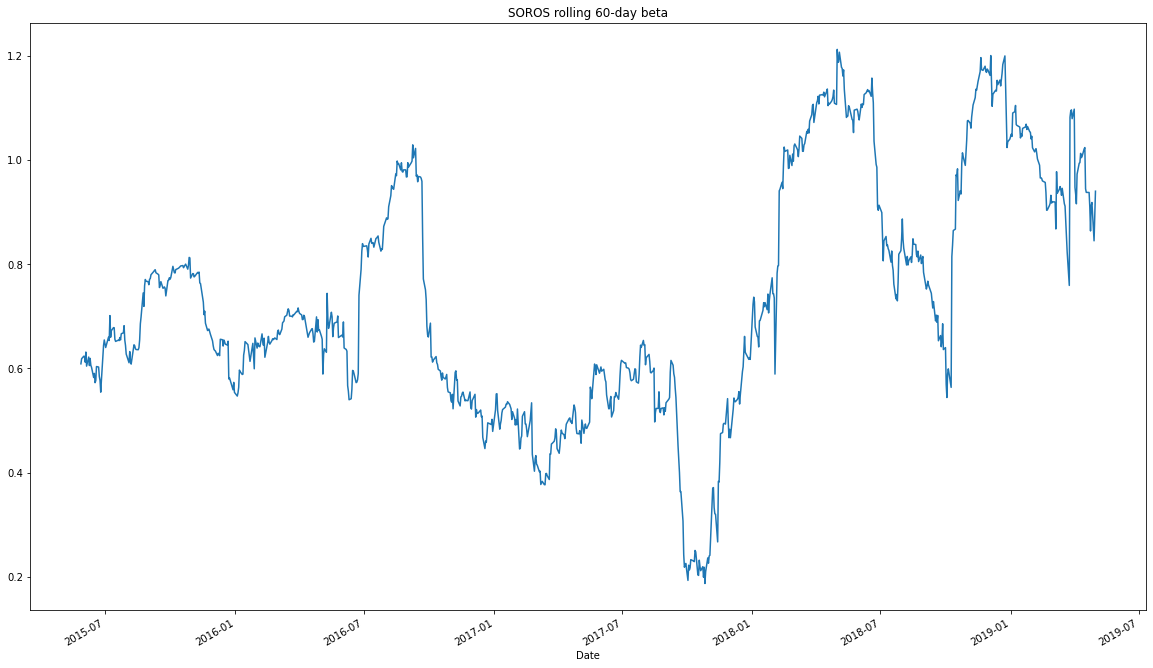

In [33]:
soros_beta_rolling.plot(figsize=(20,12), title="SOROS rolling 60-day beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [34]:
# Use `ewm` to calculate the rolling window
df_std_rolling.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


In [35]:
df_std_rolling_ewm = df_std_rolling.ewm(halflife=21).std().dropna()
df_std_rolling_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-04-01,0.000014,0.000123,0.000013,0.000073,0.000014,0.000019,0.000126
2015-04-02,0.000010,0.000091,0.000009,0.000077,0.000161,0.000045,0.000089
2015-04-06,0.000022,0.000077,0.000024,0.000094,0.000147,0.000072,0.000088
2015-04-07,0.000144,0.000092,0.000124,0.000372,0.000160,0.000197,0.000129
2015-04-08,0.000142,0.000242,0.000160,0.000337,0.000178,0.000213,0.000206
...,...,...,...,...,...,...,...
2019-04-25,0.002421,0.001483,0.010130,0.004242,0.003122,0.002245,0.001873
2019-04-26,0.002445,0.001473,0.010080,0.004263,0.003073,0.002236,0.001859
2019-04-29,0.002463,0.001470,0.010023,0.004278,0.003028,0.002227,0.001843


<AxesSubplot:xlabel='Date'>

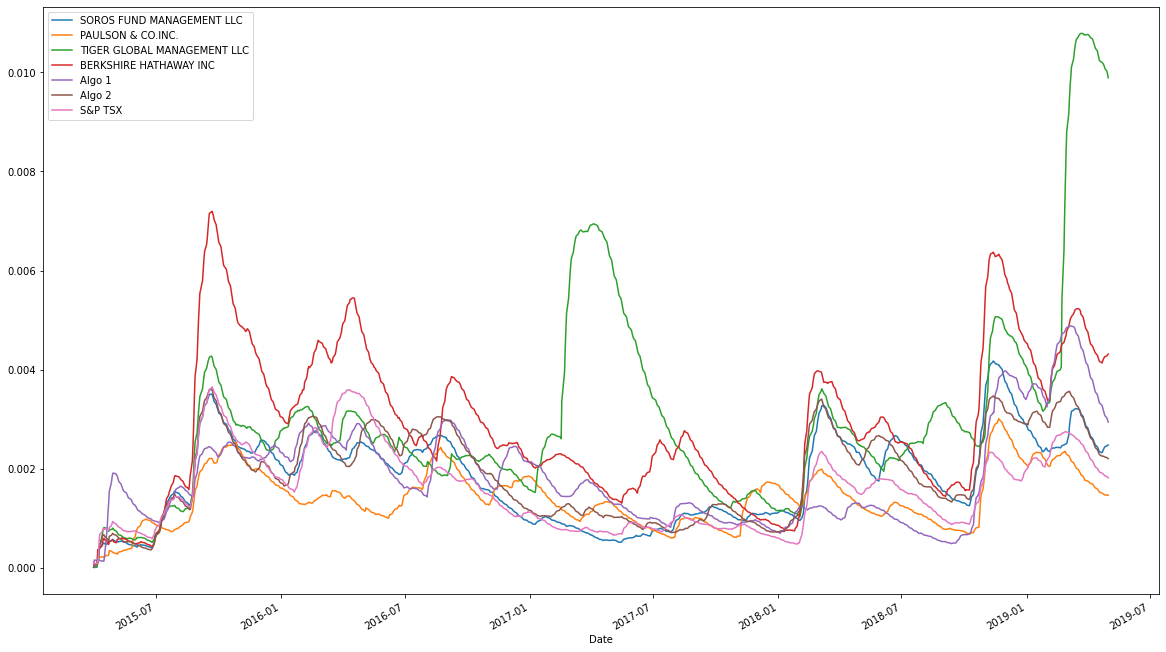

In [36]:
df_std_rolling_ewm.plot(figsize = (20,12))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Annualized Sharpe Ratios
df_sharpe_ratios = ((df.mean()-df["S&P TSX"].mean()) * 252) / (df.std() * np.sqrt(252))
df_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
S&P TSX                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

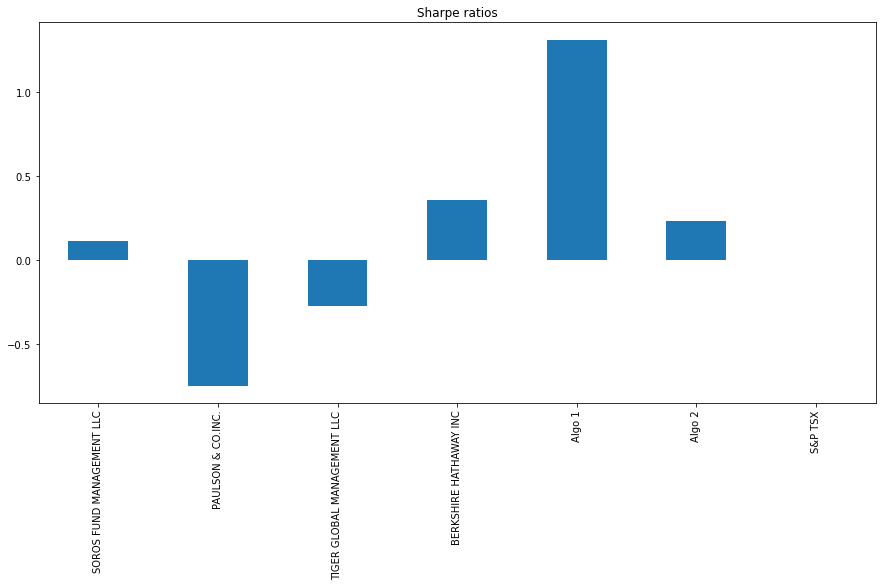

In [38]:
# Visualize the sharpe ratios as a bar plot
df_sharpe_ratios.plot(kind="bar", title="Sharpe ratios",figsize=(15,7))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

* Definition: Sharpe ratio is the measure of risk-adjusted return of a financial portfolio. A portfolio with a higher Sharpe ratio is considered superior relative to its peers. The measure was named after William F Sharpe, a Nobel laureate and professor of finance, emeritus at Stanford University. 
* Algo 1 has the highest Sharpe ratio. This suggests Algo 1 outperformed other the market and the whales portfolios as it generates greater profit per additional unit of risk.
* Note: "Considering standard deviation as a proxy for risk has its pitfalls. Standard deviation takes into account both the positive as well as the negative deviation in returns from the mean, hence it doesn’t accurately measure the downside risk. Measures like Sortino, which only considers negative deviation from the mean return, can remove the limitation of Sharpe ratio to some extent."

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Reading data from TSX60
path_tsx60 = Path("./Resources/TSX60.csv")
tsx60 = pd.read_csv(path_tsx60,parse_dates=True, index_col='Date', infer_datetime_format=True)
tsx60.rename(columns={"Close":"TSX60"},inplace=True)
tsx60.head()

,TSX60
Date,
2015-01-02,523.37
2015-01-05,512.46
2015-01-06,500.59
2015-01-07,499.73
2015-01-08,501.30


In [40]:
tsx60 = tsx60.pct_change().dropna()
tsx60.head()

,TSX60
Date,
2015-01-05,-0.020846
2015-01-06,-0.023163
2015-01-07,-0.001718
2015-01-08,0.003142
2015-01-09,-0.012946


In [41]:
# Reading data from 2nd stock
path_goog = Path("./Resources/GOOG.csv")
goog = pd.read_csv(path_goog,parse_dates=True, index_col='Date', infer_datetime_format=True)
goog.rename(columns={"Close":"GOOG"},inplace=True)
goog.dropna(inplace=True)
goog.tail()

,GOOG
Date,
2022-06-24,2370.76
2022-06-27,2332.45
2022-06-28,2251.43
2022-06-29,2245.13
2022-06-30,2187.45


In [42]:
# Reading data from 3rd stock
path_sand= Path("./Resources/SAND.csv")
sand = pd.read_csv(path_sand,parse_dates=True, index_col='Date', infer_datetime_format=True)
sand.rename(columns={"Close":"SAND"},inplace=True)
sand.tail()

,SAND
Date,
2022-06-24,6.22
2022-06-27,6.40
2022-06-28,6.23
2022-06-29,6.19
2022-06-30,5.95


In [43]:
# Reading data from 4th stock
path_lac = Path("./Resources/LAC.csv")
lac = pd.read_csv(path_lac,parse_dates=True, index_col='Date', infer_datetime_format=True)
lac.rename(columns={"Close":"LAC"},inplace=True)
lac.tail()

,LAC
Date,
2022-06-24,21.82
2022-06-27,22.72
2022-06-28,21.55
2022-06-29,20.50
2022-06-30,20.13


In [44]:
path_uun = Path("./Resources/U.UN.csv")
uun = pd.read_csv(path_uun,parse_dates=True, index_col='Date', infer_datetime_format=True)
uun.rename(columns={"Close":"U.UN"},inplace=True)
uun.dropna(inplace=True)
uun.tail()

,U.UN
Date,
2022-06-24,13.84
2022-06-27,14.29
2022-06-28,13.95
2022-06-29,13.74
2022-06-30,13.87


In [45]:
# Combine all stocks in a single DataFrame
df2 = pd.concat([goog,sand,lac,uun], join='inner', axis="columns")
df2.dropna(inplace=True)
df2.head()

,GOOG,SAND,LAC,U.UN
Date,,,,
2015-01-02,523.37,3.74,2.45,10.34
2015-01-05,512.46,3.78,2.35,10.30
2015-01-06,500.59,4.01,2.40,10.28
2015-01-07,499.73,3.80,2.44,10.48
2015-01-08,501.30,3.68,2.40,10.54


In [46]:
# Reset Date index
#df2['Date'] = pd.to_datetime(df2['Date']).dt.date
df2.reset_index()

,Date,GOOG,SAND,LAC,U.UN
0,2015-01-02,523.37,3.74,2.45,10.34
1,2015-01-05,512.46,3.78,2.35,10.30
2,2015-01-06,500.59,4.01,2.40,10.28
3,2015-01-07,499.73,3.80,2.44,10.48
4,2015-01-08,501.30,3.68,2.40,10.54
...,...,...,...,...,...
1837,2022-06-24,2370.76,6.22,21.82,13.84
1838,2022-06-27,2332.45,6.40,22.72,14.29
1839,2022-06-28,2251.43,6.23,21.55,13.95
1840,2022-06-29,2245.13,6.19,20.50,13.74


In [47]:
# Reorganize portfolio data by having a column per symbol
# Done

In [48]:
# Calculate daily returns
df2_change = df2.pct_change()
# Drop NAs
df2_change.dropna(inplace=True)
# Display sample data
df2_change.head()

,GOOG,SAND,LAC,U.UN
Date,,,,
2015-01-05,-0.020846,0.010695,-0.040816,-0.003868
2015-01-06,-0.023163,0.060847,0.021277,-0.001942
2015-01-07,-0.001718,-0.052369,0.016667,0.019455
2015-01-08,0.003142,-0.031579,-0.016393,0.005725
2015-01-09,-0.012946,0.027174,0.012500,-0.022770


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
p_returns = df2_change.dot(weights).copy()

my_returns = pd.DataFrame(p_returns)
my_returns.rename(columns= {0: "My Portfolio"},inplace = True )
# Display sample data
my_returns.head()

,My Portfolio
Date,
2015-01-05,-0.013709
2015-01-06,0.014255
2015-01-07,-0.004491
2015-01-08,-0.009776
2015-01-09,0.000989


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
df3 = pd.concat([my_returns,df], axis='columns', join='inner')
df3.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2015-03-03,-0.012145,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,-0.003793,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.014421,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.016762,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,-0.012103,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df3.dropna()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2015-03-03,-0.012145,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,-0.003793,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.014421,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.016762,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,-0.012103,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-25,-0.007487,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.025083,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,-0.013207,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
df3_annulised_std = df3.std() * np.sqrt(252)
df3_annulised_std

My Portfolio                   0.249925
SOROS FUND MANAGEMENT LLC      0.124302
PAULSON & CO.INC.              0.110476
TIGER GLOBAL MANAGEMENT LLC    0.173162
BERKSHIRE HATHAWAY INC         0.203567
Algo 1                         0.120635
Algo 2                         0.132116
S&P TSX                        0.111524
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

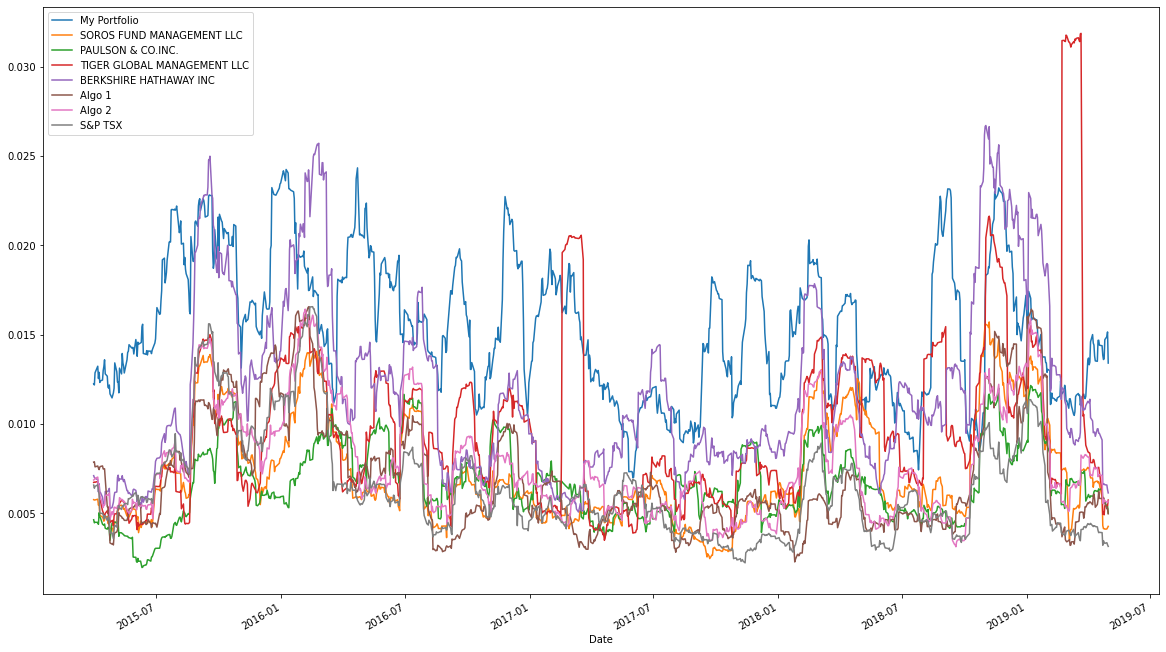

In [53]:
# Calculate rolling standard deviation
df3_rolling_std = df3.rolling(window=21).std().copy().dropna()
# Plot rolling standard deviation
df3_rolling_std.plot(figsize=(20,12))

### Calculate and plot the correlation

<AxesSubplot:>

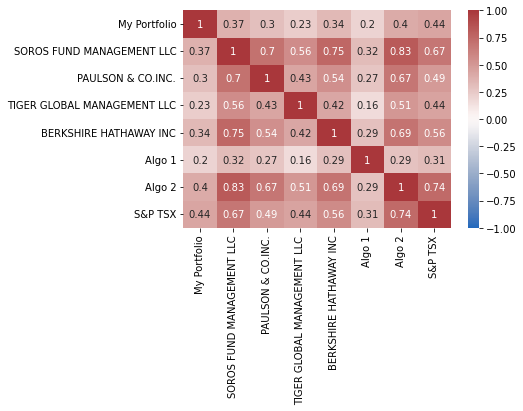

In [54]:
# Calculate and plot the correlation
df3_corr = df3.corr()
sns.heatmap(df3_corr, annot=True, cmap='vlag', vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-day Beta of My portfolio'}, xlabel='Date'>

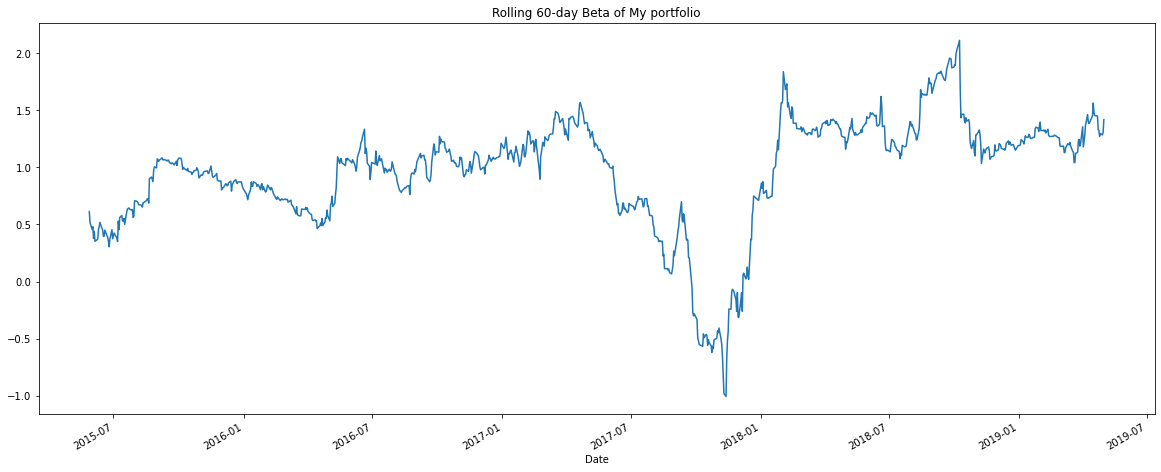

In [55]:
# Calculate and plot Beta

cov_rolling = df3['My Portfolio'].rolling(window=60).cov(df3['S&P TSX'])
var_rolling = df3['S&P TSX'].rolling(window=60).var()
beta_rolling = cov_rolling/var_rolling
beta_rolling.plot(figsize=(20,8), title='Rolling 60-day Beta of My portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualized Sharpe Ratios
df3_sharpe_ratios = ((df3.mean()-df3["S&P TSX"].mean()) * 252) / (df3.std() * np.sqrt(252))
df3_sharpe_ratios

My Portfolio                   0.605511
SOROS FUND MANAGEMENT LLC      0.084452
PAULSON & CO.INC.             -0.752912
TIGER GLOBAL MANAGEMENT LLC   -0.291442
BERKSHIRE HATHAWAY INC         0.271184
Algo 1                         1.272558
Algo 2                         0.247863
S&P TSX                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

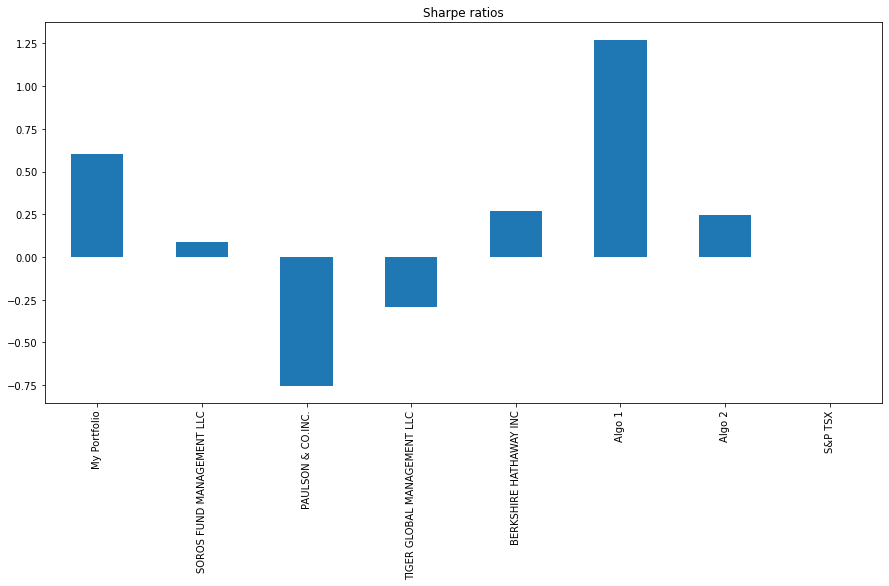

In [57]:
# Visualize the sharpe ratios as a bar plot
df3_sharpe_ratios.plot(kind='bar', title='Sharpe ratios', figsize=(15,7))

### How does your portfolio do?

Write your answer here!